## Installs

In [ ]:
!pip install qiskit pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.4 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_aer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.8 MB/s eta 0:00:00


## Imports

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit.visualization import plot_histogram, visualize_transition, plot_bloch_vector

## Operações em um qubit

### Código Referência

Portas de 1-qubit comuns:

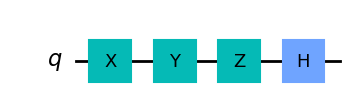

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.z(0)
qc.h(0)
qc.draw("mpl")

Rotações e porta de fase:

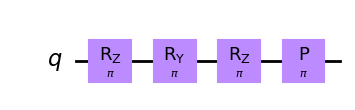

In [ ]:
qc = QuantumCircuit(1)
qc.rz(np.pi, 0)
qc.ry(np.pi, 0)
qc.rz(np.pi, 0)
qc.p(np.pi, 0)
qc.draw("mpl")

Visualização na esfera de Bloch

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
visualize_transition(qc)

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
visualize_transition(qc)

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
visualize_transition(qc)

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
visualize_transition(qc)

### Exercícios

Primeiro, vamos exercitar a implementação de portas simples no circuito

1) Implemente um circuito de um qubit que represente a unitária $R_z(\pi/2) X H$. Preste atenção que na ordem matricial, o primeiro operador a ser aplicado é o mais à direita

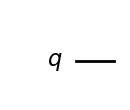

In [ ]:
qc = QuantumCircuit(1)
#implemente seu código aqui
qc.draw("mpl")

2) Implemente um circuito de um qubit que represente a unitária $P(\pi) X R_y(\pi/4) Z Y$

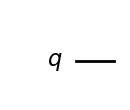

In [ ]:
qc = QuantumCircuit(1)
#implemente seu código aqui
qc.draw("mpl")

## Utilizando um backend

Agora, vamos utilizar um backend para mostrar alguns resultados

In [ ]:
def run_statevector(circ):
  sv_simulator = Aer.get_backend("statevector_simulator")
  job = sv_simulator.run(circ)
  result = job.result()
  return result.get_statevector()

qc = QuantumCircuit(1)
state_vector = run_statevector(qc)
state_vector.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
def run_qasm_counts(circ, shots=1024):
  qc.measure_all()
  qasm_simulator = Aer.get_backend("qasm_simulator")
  job = qasm_simulator.run(qc, shots=shots)
  result = job.result()
  return result.get_counts()

qc = QuantumCircuit(1)
counts = run_qasm_counts(qc)
counts

{'0': 1024}

Agora, vamos aplicar os operadores:

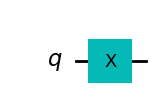

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

In [ ]:
state_vector = run_statevector(qc)
state_vector.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
counts = run_qasm_counts(qc)
counts

{'1': 1024}

O mesmo para o estado em $(|0>+|1>)/2$

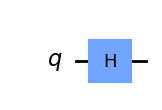

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

In [ ]:
state_vector = run_statevector(qc)
state_vector.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
counts = run_qasm_counts(qc, shots=1024)
counts

{'0': 534, '1': 490}

Rode novamente os counts para 2048, 4096 e 8192 shots

Agora, faça o mesmo para $R_y(\pi/3)$. Basta os 1024 shots (Não precisa passar o argumento)

## Sistema com múltiplos qubits

Por fim, apliquemos operadores de 1 qubit em sistemas multi-qubit. Nesse exercício, você deve inicializar um Quantum Circuit com 3 qubits e aplicar uma porta Hadamard (H) no qubit 0, uma porta X seguida de um $R_y(\pi)$ no qubit 1 e uma porta Z no qubit 2

Nesse caso, também utilizaremos registradores clássicos para salvar as medições de qubits individuais

In [ ]:
qc = QuantumCircuit(3,2)

#insira seu código aqui


qc.measure(0,0)
qc.measure(2,1)
qc.draw('mpl')

In [ ]:
qasm_simulator = Aer.get_backend("qasm_simulator")
job = qasm_simulator.run(qc, shots=1024)
result = job.result()
result.get_counts()

{'00': 518, '01': 506}

## Operações de 2 qubits

### CNOTs

Para portas de 2 qubits, começamos falando da porta CNOT

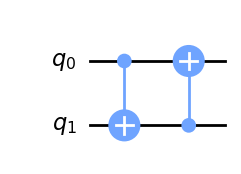

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.cx(1, 0)
qc.draw("mpl")

Se o q0 esta inicializado em 0:

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
state_vector = run_statevector(qc)
state_vector.draw('latex')

<IPython.core.display.Latex object>

Se q0 for inicializado em 1:

In [ ]:
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0, 1)
state_vector = run_statevector(qc)
state_vector.draw('latex')

<IPython.core.display.Latex object>

1) Aplique operadores X no primeiro Qubit para implementar uma porta controlada de controle aberto. O state vector deve ser $|10>$



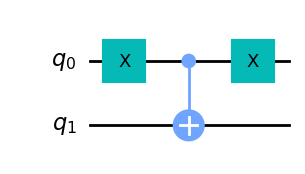

In [ ]:
qc = QuantumCircuit(2)
#insira o código

qc.draw("mpl")

In [ ]:
state_vector = run_statevector(qc)
state_vector.draw('latex')

<IPython.core.display.Latex object>

2) Aplique a porta hadamard no q0 antes da porta CNOT. Qual o nosso estado final?

3) Construa um circuito com 3 qubits com uma porta X no qubit 0, porta $R_y(\pi/3)$ no qubit 2, e uma CNOT do qubit 2 pro 1. Calcule o statevector

### SWAP

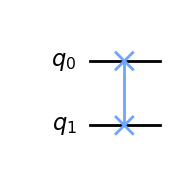

In [ ]:
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.draw("mpl")

Um exemplo de uso do swap. Primeiro, fazemos um caso base em que apenas aplicamos a porta $X$ no qubit 1

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
state_vector = run_statevector(qc)
state_vector.draw('latex')

<IPython.core.display.Latex object>

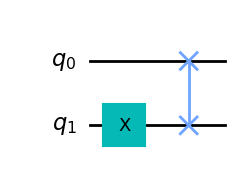

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
qc.swap(0, 1)
qc.draw('mpl')

In [ ]:
state_vector = run_statevector(qc)
state_vector.draw('latex')

<IPython.core.display.Latex object>

Exercício: Aplique uma H no qubit 0, uma CNOT(0,1) e um swap (0,2) e veja o statevector

### Rotações Controladas

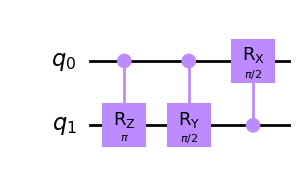

In [ ]:
qc = QuantumCircuit(2)
qc.crz(np.pi, 0, 1)
qc.cry(np.pi/2, 0, 1)
qc.crx(np.pi/2, 1, 0)
qc.draw("mpl")

Implemente um circuito com uma porta H em q0, uma CNOT(0,1) e uma $R_y(\pi/4)$ controlada (1,2)

### Exercício

Construa um circuito com 5 qubits com as operações:
- $H$ no qubit 1
- CNOT em (1,0)
- $R_y(\pi/3)$ no qubit 2
- CNOT em (2,4)
- SWAP (3,4)

E calcule o statevector e os counts após 1024 medições

### Estados de Bell

Implementar os outros 3 estados de Bell

In [ ]:
bell_01 = QuantumCircuit(2)
#insira seu código

bell_01.draw("mpl")
state_vector = run_statevector(bell_01)
state_vector.draw('latex')

In [ ]:
bell_10 = QuantumCircuit(2)
#insira seu código

bell_10.draw("mpl")
state_vector = run_statevector(bell_10)
state_vector.draw('latex')

In [ ]:
bell_11 = QuantumCircuit(2)
#insira seu código

bell_11.draw("mpl")
state_vector = run_statevector(bell_11)
state_vector.draw('latex')

## Exercícios extras

Para provar uma identidade entre dois circuitos, você pode avaliar os dois circuitos em cada elemento da base (Tem que considerar todos os qubits, a base do produto tensorial) e mostrar que são iguais. Construa os circuito da esquerda e calcule os statevector para cada combinação vetor da base (00, 01, 10, 11), para mostrar a seguinte identidade:

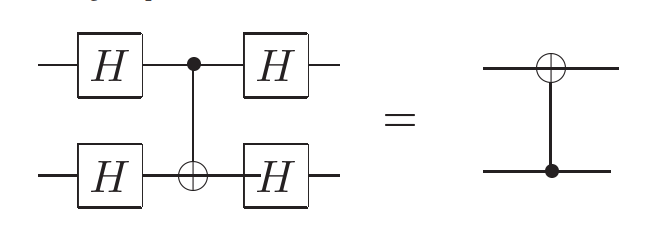

De forma semelhante, mostre que uma porta SWAP é equivalente à sequencia de portas CNOT(0,1), CNOT(1,0), CNOT(0,1)